# Group By

In [1]:
import pandas as pd

df = pd.read_csv("weather_by_cities.csv")

df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [2]:
gb = df.groupby('city')

gb

In [3]:
for city, data in gb:
    print("City: ", city)
    print()
    print(data)
    print()

City:  mumbai

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain

City:  new york

        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny

City:  paris

         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy



In [4]:
gb.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [5]:
gb.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [6]:
gb.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [7]:
gb.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [8]:
gb.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [9]:
gb.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


In [11]:
gb.count?

# Concatenation

In [16]:
indian_weather = pd.DataFrame({
    "city": ['mumbai', 'delhi', 'indore'],
    "temperature": [32,45,30],
    "humidity": [80, 60,78]
})

indian_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,indore,30,78


In [17]:
us_weather = pd.DataFrame({
    "city": ['new york', 'chicago', 'orlando'],
    "temperature": [21,14,25],
    "humidity": [88, 25,75]
})

us_weather

,city,temperature,humidity
0,new york,21,88
1,chicago,14,25
2,orlando,25,75


In [18]:
df = pd.concat([indian_weather, us_weather])

df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,indore,30,78
0,new york,21,88
1,chicago,14,25
2,orlando,25,75


In [19]:
df = pd.concat([indian_weather, us_weather], ignore_index=True)

df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,indore,30,78
3,new york,21,88
4,chicago,14,25
5,orlando,25,75


In [20]:
df = pd.concat([indian_weather, us_weather], keys = ['india', 'us'])

df

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2    indore           30        78
us    0  new york           21        88
      1   chicago           14        25
      2   orlando           25        75

In [21]:
df.loc['us']

,city,temperature,humidity
0,new york,21,88
1,chicago,14,25
2,orlando,25,75


In [22]:
type(df.loc['us'])

pandas.core.frame.DataFrame

In [29]:
df = pd.concat([indian_weather, us_weather], axis = 1)

df

,city,temperature,humidity,city,temperature,humidity
0,mumbai,32,80,new york,21,88
1,delhi,45,60,chicago,14,25
2,indore,30,78,orlando,25,75


In [30]:
df[['city']]

,city,city
0,mumbai,new york
1,delhi,chicago
2,indore,orlando


In [24]:
s = pd.Series(['humid', 'dry', 'rain'], name='Event')

s

0    humid
1      dry
2     rain
Name: Event, dtype: object

In [25]:
df = pd.concat([indian_weather, s], axis = 1)

df

,city,temperature,humidity,Event
0,mumbai,32,80,humid
1,delhi,45,60,dry
2,indore,30,78,rain


# Exploratory Data Analysis

Titanic Survival Prediction Analysis

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
titanic = pd.read_csv("titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

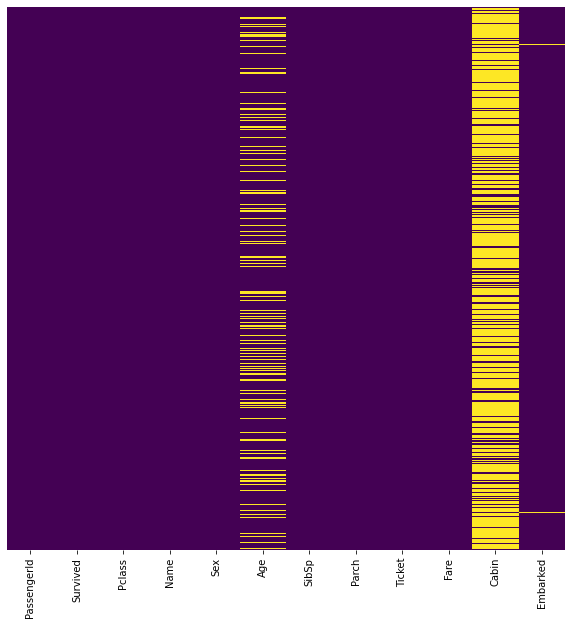

In [34]:
plt.figure(figsize=(10,10))

sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

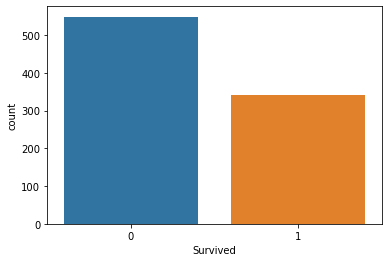

In [35]:
sns.countplot(x = 'Survived', data=titanic, palette = None)

<AxesSubplot:xlabel='Survived', ylabel='count'>

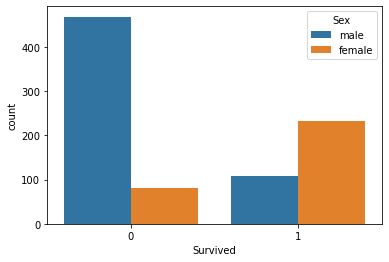

In [36]:
sns.countplot(x = 'Survived', hue='Sex' , data=titanic, palette = None)

<AxesSubplot:xlabel='Survived', ylabel='count'>

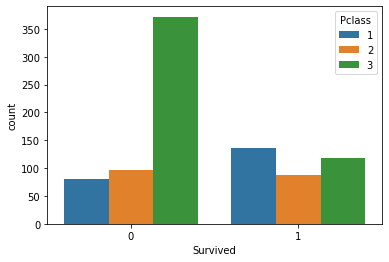

In [37]:
sns.countplot(x = 'Survived', hue='Pclass' ,data=titanic, palette = None)

<AxesSubplot:xlabel='Survived', ylabel='count'>

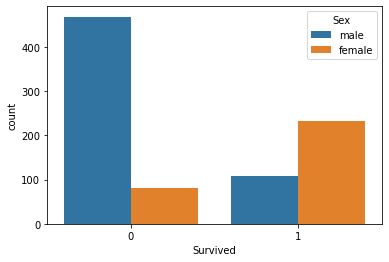

In [44]:
sns.countplot(x = 'Survived', hue='Sex' ,data=titanic.loc[titanic['Pclass'] != ''], palette = None)

In [39]:
titanic.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [ ]:
# plot the survived vs pclass vs gender

In [45]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [46]:
def age_calculator(cols):
    age_map = [38, 30, 25]
    age, pclass = cols[0], cols[1]
    
    if pd.isnull(age):
        return age_map[int(pclass - 1)]
    else:
        return age

In [47]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_calculator, axis = 1)  # [NaN, 3]

In [48]:
titanic.drop('Cabin', axis=1, inplace=True)

In [49]:
titanic.dropna(inplace = True)

<AxesSubplot:>

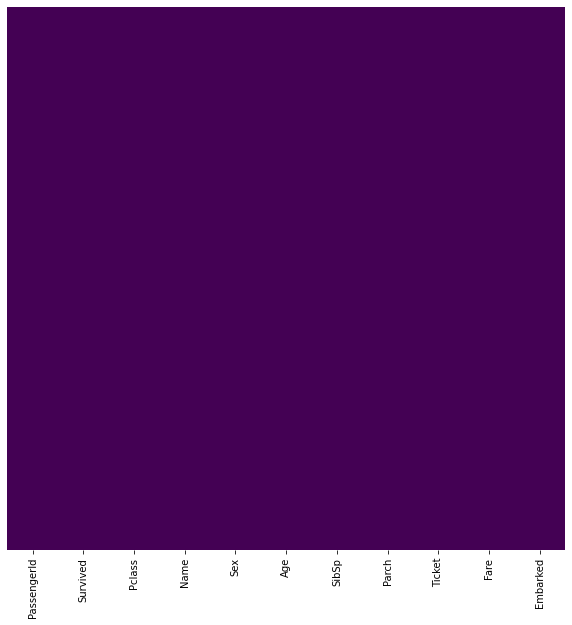

In [50]:
plt.figure(figsize=(10,10))

sns.heatmap(titanic.isnull(), yticklabels = False, cbar=False, cmap='viridis')

In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Feature Engineering

In [52]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [53]:
gender = pd.get_dummies(titanic['Sex'], drop_first = True)

# male  female
#  1      0
#  0      1
#  1      0

gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [54]:
embark = pd.get_dummies(titanic['Embarked'])

embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [56]:
sibsp = pd.get_dummies(titanic['SibSp'], prefix='SibSp')

sibsp.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [57]:
parch = pd.get_dummies(titanic['Parch'], prefix='Parch')

parch.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


## combine all the features

In [58]:
titanic = titanic.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch',
                      'Ticket', 'Embarked'], axis = 1)

titanic.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [59]:
titanic = pd.concat([titanic, gender, embark, sibsp, parch], axis = 1)

titanic.head()

,Survived,Pclass,Age,Fare,male,C,Q,S,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,22.0,7.2500,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
